<a href="https://colab.research.google.com/github/hukim1112/one-day-DL/blob/main/1_Pytorch_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import cv2
import torch
from matplotlib import pyplot as plt

# Step 1. Pytorch
------

파이토치는 FAIR(Facebook AI Research)에서 개발한 전세계에서 가장 인기있는 오픈소스 기반의 딥러닝 프레임워크입니다. 딥러닝을 위한 거의 모든 실험과 개발목표를 달성할 수 있고, 빠른 프로토타이핑 개발과 강력한 오픈소스 생태계가 매우 큰 강점입니다.

딥러닝에서 데이터를 표현하기 위해 텐서(Tensor) 자료형을 사용하며, Pytorch에서는 텐서라는 이름의 다중차원의 배열로 데이터를 다룹니다. 파이썬의 numpy에 익숙하다면 이는 np.array의 일종이라고 생각할 수 있습니다. 파이토치는 텐서를 연산하는 다양한 연산자와 모델을 제공합니다.

In [ ]:
import torch

# 0차원(스칼라) 텐서 생성
tensor_0d = torch.tensor(4)
print("0D Tensor:", tensor_0d)

# 1차원 텐서 생성
tensor_1d = torch.tensor([2.0, 3.0, 4.0])
print("1D Tensor:", tensor_1d)

# 2차원 텐서 생성
tensor_2d = torch.tensor([[1, 2],
                           [3, 4],
                           [5, 6]], dtype=torch.float16)
print("2D Tensor:", tensor_2d)

In [ ]:
# 텐서의 크기 확인
print("Shape of tensor_2d:", tensor_2d.shape)

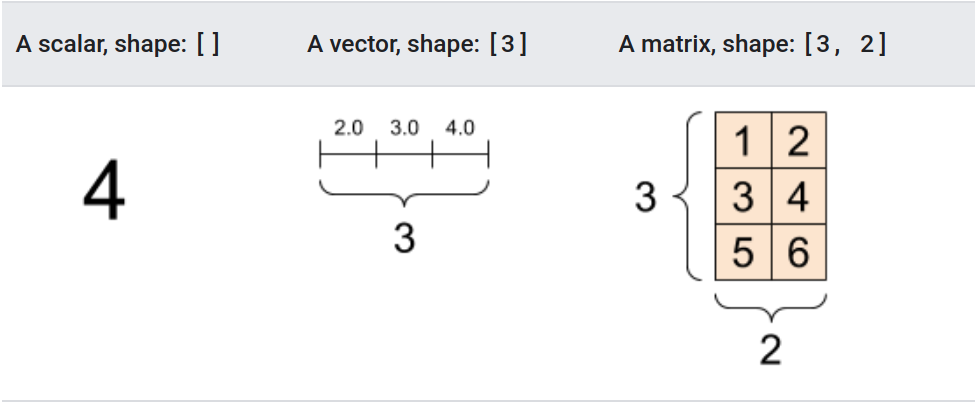

In [ ]:
# 3차원 텐서 생성
tensor_3d = torch.tensor([[[1, 2], [3, 4]],
                           [[5, 6], [7, 8]]], dtype=torch.float32)
print("3D Tensor:", tensor_3d)

# 텐서의 크기 확인
print("Shape of tensor_3d:", tensor_3d.shape)

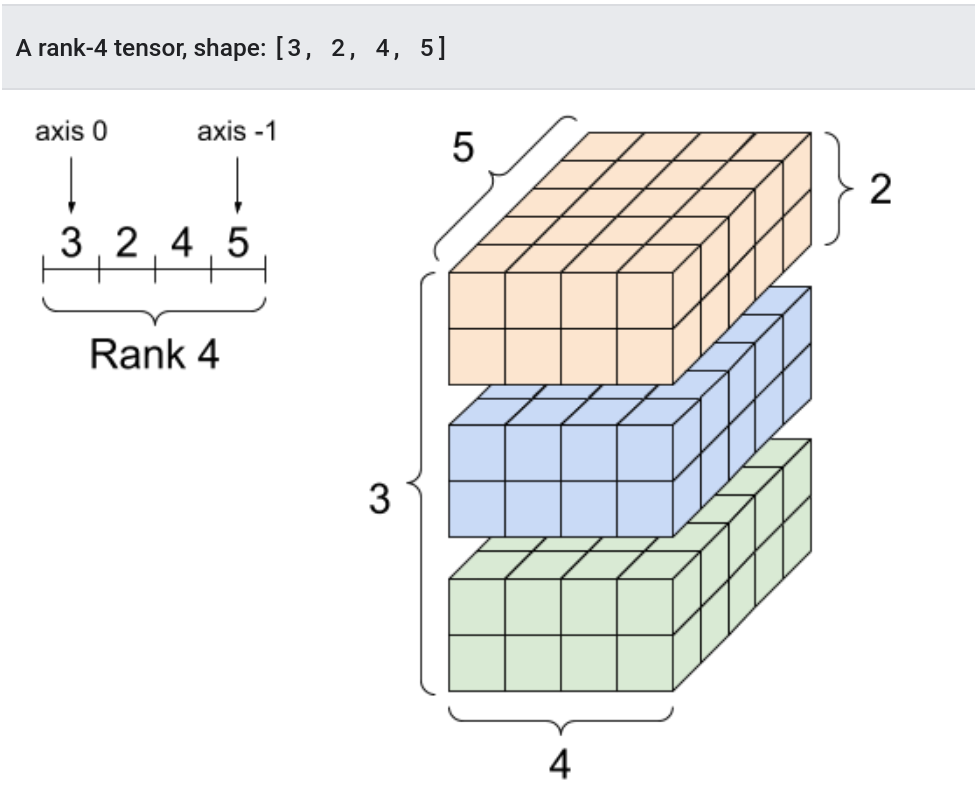

파이토치는 tensor를 사용한 덧셈, 뺄셈 그리고 아다마르 곱(element-wise multiplication), 행렬곱(matrix multiplication) 등을 포함한 다양한 연산자를 제공합니다.

In [ ]:
a = torch.tensor([[1, 2],
                 [3, 4]])
b = torch.tensor([[1, 0],
                 [0, 1]]) # Could have also said `tf.ones([2,2])`

print("덧셈 : \n", torch.add(a, b), "\n")
print("요소 별(element-wise) 곱셈 : \n", torch.multiply(a, b), "\n")
print("행렬 곱셈 : \n", torch.matmul(a, b))

다음과 같이 같은 동작을 할 수도 있습니다.

In [ ]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

# 자동미분(Auto differentiation)

딥러닝 프레임워크에서 가장 중요한 부분은 연산과정에서 어떤 두 변수 y와 x 사이의 자동미분을 추적해준다는 것입니다. 딥러닝 모델 최적화를 위해 경사하강법을 사용하므로 이는 매우 중요한 기능입니다.

간단한 함수의 미분을 PyTorch로 계산하는 방법 예시

In [ ]:
import torch

# 입력값 x를 생성 (requires_grad=True 설정 → 미분 계산 활성화)
x = torch.tensor(2.0, requires_grad=True)

# 함수 정의: y = x^2
y = x ** 2

# 자동 미분 실행 (dy/dx 계산)
y.backward()

# 미분값 출력 (dy/dx = 2x)
print(x.grad)  # 결과: tensor(4.)


f가 평균제곱오차(MSE Loss)일 때, w에 대한 미분 계산 예제

In [ ]:
# 데이터 생성
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)  # 입력값 (고정)
true = torch.tensor([2.0, 4.0, 6.0], requires_grad=False)  # 실제값

# 학습할 파라미터 (requires_grad=True 설정 → 미분 활성화)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# 예측값 계산: y = x * w + b
y = x * w + b

# 손실 함수 (MSE Loss)
f = torch.mean((y - true) ** 2)

# 자동 미분 실행 (df/dw, df/db 계산)
f.backward()

우리가 관심있는 것은 w와 b의 변화에 따른 함수 f의 변화량이며, 이를 gradient라 한다.

w와 b 각각의 gradient $\frac{\partial{f}}{\partial{w_i}}$, $\frac{\partial{f}}{\partial{b_j}}$를 계산한 것을 df/dw, df/db라 하자.

In [ ]:
print("df/dw:", w.grad)  # w에 대한 기울기
print("df/db:", b.grad)  # b에 대한 기울기

# Step 2. 데이터 표현

------

# 구조형 데이터 처리.

구조형 데이터는 머신러닝 모델이 다룰 수 있도록 다양한 전처리 과정을 거쳐야 합니다. 대표적인 전처리 과정은 결측치 처리, 범주형 변수 변환, 스케일링(정규화/표준화), 특징공학이 있습니다.

주어진 [LendingClub.com](www.lendingclub.com) 데이터셋은 광범위한 신용 관련 데이터입니다. 우리는 주어진 사람에게 대출을 해주었을 때의 리스크를 예측하려고 합니다. 2007년부터 2010년까지의 대출 데이터를 사용하고 **차용인이 대출금을 전액 상환했는지 여부(not.fully.paid)를 분류**하고 예측하는 것이 목적입니다.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hukim1112/MLDL/master/lecture3/loan_data.csv')

In [ ]:
df.head(5)

In [ ]:
label = df.pop("not.fully.paid")

In [ ]:
label # 정답값. 0 => 모든 빚을 갚지 않음. 1=> 모든 빚을 갚음.

In [ ]:
df.head(5)

purpose는 범주형(categorical) 데이터이므로, 이를 머신러닝 또는 딥러닝 모델이 처리할 수 있도록 수치형(numerical) 데이터로 변환해야 합니다.

In [ ]:
import pandas as pd

# One-Hot Encoding 적용
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True).astype(float)  # 첫 번째 열을 제거하여 다중공선성 방지

In [ ]:
df_encoded.head(5)

In [ ]:
df_encoded.describe()

머신러닝 모델의 성능을 높이기 위해 정규화(Normalization) 또는 표준화(Standardization) 를 수행합니다. 특히, 연속형(numeric) 변수들의 스케일 차이가 클 경우 모델이 특정 피처에 과도하게 의존하는 것을 방지하기 위해 필요합니다.

In [ ]:
df_backup = df_encoded.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 적용
scaler = StandardScaler()

# 수치형 변수 선택 (One-Hot Encoding된 범주형 변수 제외)
num_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths']

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.describe()  # 평균이 0, 표준편차가 1에 가까운 값으로 변환됨

In [ ]:
df_encoded.head(5)

In [ ]:
df_backup.iloc[[0]]

In [ ]:
scaler.transform(df_backup.iloc[[0]][num_cols])  # 컬럼 일치 유지

# 이미지(Image) 데이터 처리

이미지는 픽셀로 이루어진 고차원 데이터입니다. 각 픽셀은 색상 정보를 포함하며, 이미지 처리에서 중요한 요소입니다.

- 흑백 이미지: 2차원 배열로 표현되며, 각 픽셀은 0~255 범위의 밝기 값을 가짐

- 컬러 이미지: 3차원 배열(RGB 채널)로 구성되며, 각 픽셀은 빨강, 초록, 파랑 값으로 색상을 표현

이미지의 특성

- 고차원성: 예를 들어, 100x100 픽셀 이미지의 경우 흑백은 10,000개, RGB는 30,000개의 특성을 가짐

- 공간적 연관성: 이웃한 픽셀들은 유사한 값을 가지며, 객체 인식에 중요한 역할을 함

- 스케일 변화 민감성: 같은 객체라도 크기, 방향, 위치가 다를 수 있어 모델이 고려해야 할 요소

- 전처리의 중요성: 크기 조정, 정규화, 데이터 증강 등이 모델 성능에 큰 영향을 줌

In [ ]:
!wget -O beach.jpg https://pix10.agoda.net/hotelImages/301716/-1/fe9724d8fb4da3dd4590353bd771a276.jpg?s=1024x768

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 로드 (BGR을 RGB로 변환)
image = cv2.imread("beach.jpg")[:,:,::-1]

# 이미지 정보 출력
print(f"이미지의 크기(shape): {image.shape}")
print(f"데이터 타입: {image.dtype}")
print(f"(50, 50) 좌표에서의 픽셀 값 : {image[50,50]}")

# 원본 이미지 출력
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# 이미지의 특정 영역(ROI, Region of Interest)에 색상 적용
modified_image = image.copy()
modified_image[100:600, 0:600, :] = (255, 0, 0)  # 빨간색 적용

# 수정된 이미지 출력
plt.imshow(modified_image)
plt.title("Modified Image (Red Box)")
plt.axis("off")
plt.show()

# 그레이스케일 변환
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# 텍스트 데이터 처리

텍스트 데이터도 최종적으로 텐서(Tensor)로 변환되어야 합니다. 텍스트 데이터도 결국 숫자로 변환되어 텐서 형태로 모델에 입력되며, 벡터화 방식과 모델에 따라 텐서의 구조가 달라짐

- 토큰화(Tokenization) → 문장을 단어나 서브워드 단위로 나눔
- 정규화(Normalization) → 대소문자 변환, 불필요한 문자 제거
- 벡터화(Vectorization) → 텍스트를 수치 데이터로 변환 (단어 임베딩 사용)

가장 간단한 형태로 텍스트를 전처리하는 방식인 bag-of-words입니다. 단순히 토큰화 이후 빈도를 카운팅하여 문장 단위로 벡터 표현을 만듭니다.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 샘플 텍스트 데이터
data = {"text": [
    "딥러닝 모델을 학습시키기 위해 텍스트 데이터를 전처리해야 합니다.",
    "텍스트 데이터를 숫자로 변환하는 다양한 방법이 있습니다.",
    "Bag-of-Words, TF-IDF, 워드 임베딩 등이 대표적입니다."
]}

df = pd.DataFrame(data)

# 1. Bag-of-Words (BoW) 벡터화
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df["text"])
print("Bag-of-Words Representation:")
pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

반면 복잡한 문맥 정보를 처리하기 위해, 방대한 단어사전을 바탕으로 모델에게 토큰 시퀀스를 전달하는 현대적인 방식은 다음과 같습니다.

In [ ]:
import pandas as pd
from transformers import AutoTokenizer

df = pd.DataFrame(data)

# Hugging Face 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

# 토큰화 및 인코딩
df["tokenized"] = df["text"].apply(lambda x: tokenizer.tokenize(x))
df["input_ids"] = df["text"].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

print("Tokenized Text:")
print(df["tokenized"])

print("\nInput IDs:")
print(df["input_ids"])


In [ ]:
key = [k for k, v in tokenizer.vocab.items() if v == 9126]
print(key)

In [ ]:
tokenizer.vocab

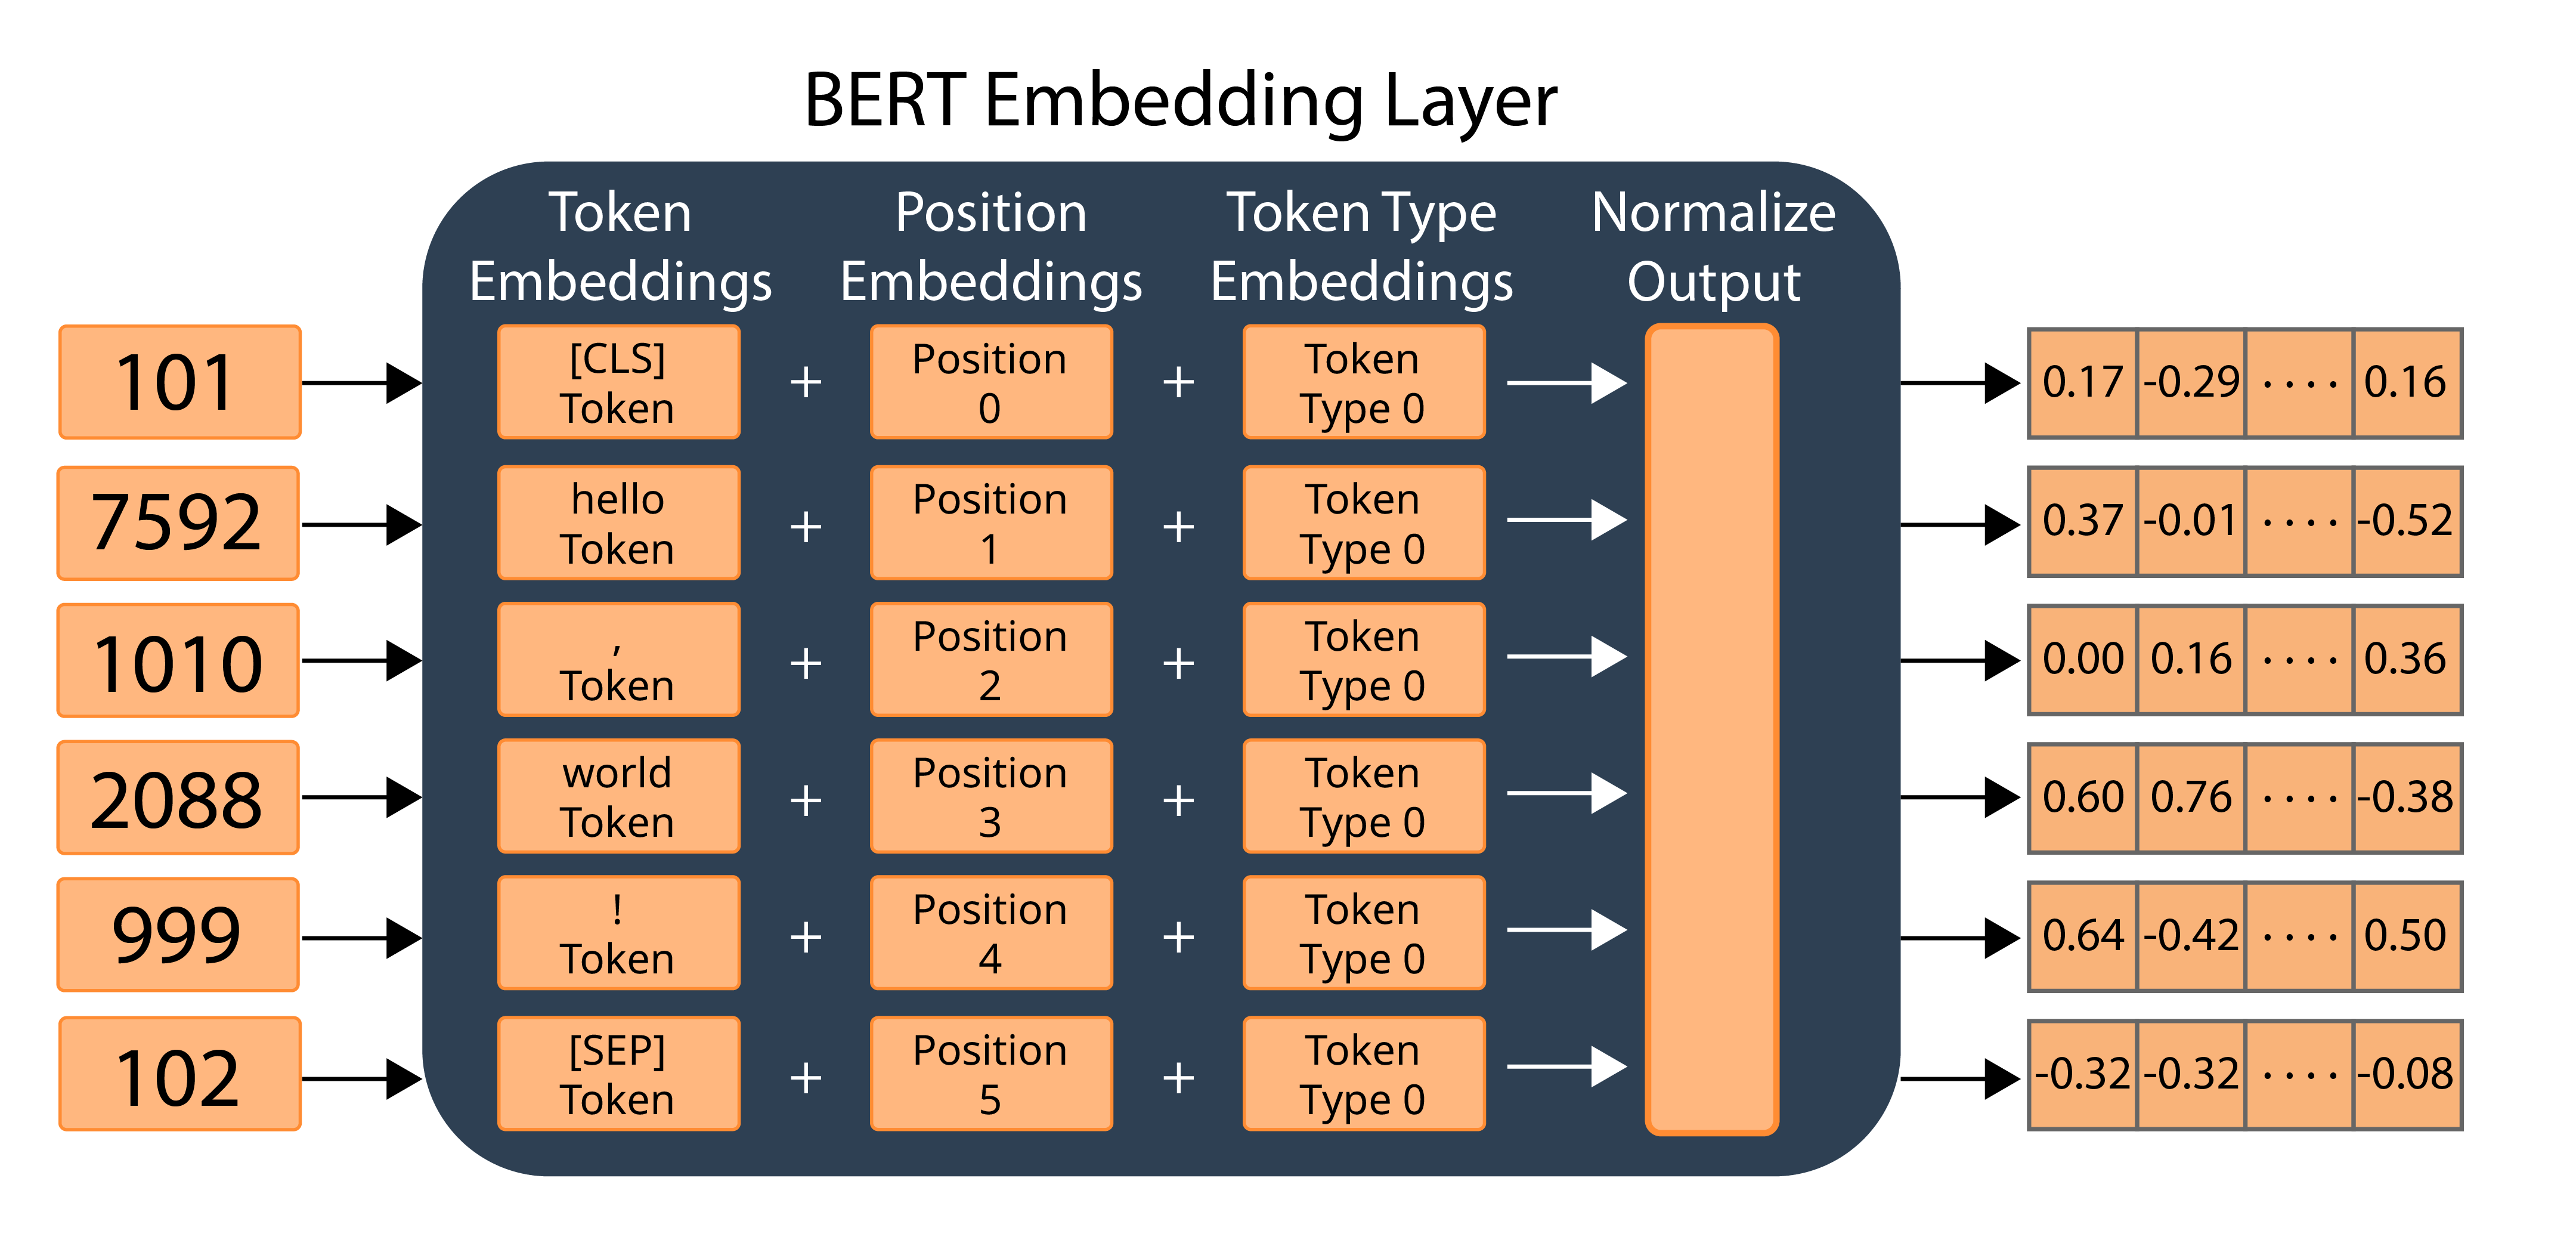

# Step 3. Regression Task
------

# 선형 회귀 문제

데이터 분포가 선형성(y와 x 사이의 명확한 상관성)을 가질 때, 데이터 공간에서의 구조를 선형회귀 모델을 통해 추론 할 수 있습니다. 데이터의 특징이 1개일 때 선형회귀 모델은 2차원 공간(x,y)에서 직선, 2개일 때 3차원 공간(x1,x2,y)에서의 평면입니다.

선형적 데이터 생성 및 선형 회귀 모델 학습: 간단한 선형 데이터를 생성하고, 이를 사용하여 머신러닝의 선형 회귀 모델을 학습시킵니다. 그 후, 학습된 모델을 사용하여 데이터를 예측하고 시각화하여 모델이 데이터의 분포를 얼마나 잘 반영하는지 확인합니다.

In [ ]:
import numpy as np
import torch
import plotly.graph_objects as go

# 데이터 개수 설정
m = 100

# 난수 고정 (재현성 확보)
np.random.seed(2022)
x1 = np.random.randn(m, 1)
x2 = np.random.randn(m, 1)
y = x1 + x2 + np.random.rand(m, 1)  # 선형 관계 y = x1 + x2 + noise

# 3D 산점도 시각화 (X1, X2, Y)
fig = go.Figure(data=[go.Scatter3d(
    x=x1[:,0], y=x2[:,0], z=y[:,0],
    mode='markers',
    marker=dict(size=3, colorscale='blues', opacity=0.8)
)])

fig.update_layout(scene=dict(xaxis_title='X1', yaxis_title='X2', zaxis_title='Y'),
                  width=700, margin=dict(r=20, b=10, l=10, t=10))
fig.show()


# Low-level training code.

선형모델을 사용해 데이터 학습

In [ ]:
import torch
import matplotlib.pyplot as plt

# 데이터 변환 (NumPy → PyTorch Tensor)
x = np.concatenate([x1, x2], axis=-1)
train_x = torch.tensor(x, dtype=torch.float32)
train_y = torch.tensor(y, dtype=torch.float32)

# 모델 파라미터 초기화 (2개의 입력을 받는 가중치 w, 편향 b)
w = torch.rand(size=(2, 1), requires_grad=True)
b = torch.ones(size=[1], requires_grad=True)

# 학습 설정
learning_rate = 0.01
epochs = 50
losses = []

# 선형 회귀 학습 루프
for step in range(epochs):
    pred = torch.matmul(train_x, w) + b  # y = xW + b
    J = torch.mean((pred - train_y) ** 2)  # MSE Loss 계산
    J.backward()  # 그래디언트 계산

    # 그래디언트 업데이트 (경사하강법 적용)
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
        w.grad.zero_()
        b.grad.zero_()

    losses.append(J.item())  # 손실 기록
    if step % 10 == 0:
        print(f"Step {step}: Loss {J.item():.4f}")

# 손실 감소 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title("Loss Reduction over Training")
plt.show()


# PyTorch 스타일 선형 회귀

실제로 파이토치 모델을 학습시킬 때 위와 같은 저수준 프로그래밍 대신, 우리는 파이토치가 제공하는 아래와 같은 [고수준 API](https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html)를 통해 프로그래밍합니다.

고수준 API에서는 nn.Module로 모델 구조를 정의하고, optimizer로 경사하강법을 은닉화합니다.

이 방식은 파이토치를 사용하는 표준적인 방식이며, 코드가 간결하고 유지보수성이 뛰어나며, 확장성이 높아 모델을 쉽게 변경 가능합니다. 또한 PU 가속, 분산 학습, 배포 기능을 쉽게 활용할 수 있습니다.

In [ ]:
# 선형 회귀 모델 클래스 정의
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

train_x = torch.tensor(x, dtype=torch.float32)
train_y = torch.tensor(y, dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.01

# 모델, 손실 함수, 최적화 방법 정의
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 학습 과정
for step in range(50):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 10 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()


## 모델의 예측을 10 step마다 시각화해보겠습니다.

In [ ]:
import time
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

# 데이터 생성
np.random.seed(2022)
m = 100
x1 = np.random.randn(m, 1)
x2 = np.random.randn(m, 1)
y = x1 + x2 + np.random.rand(m, 1)

# 입력 데이터 변환
x = np.concatenate([x1, x2], axis=-1)
train_x = torch.tensor(x, dtype=torch.float32)
train_y = torch.tensor(y, dtype=torch.float32)

# 모델, 손실 함수, 최적화 방법 설정
learning_rate = 0.01
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 학습 과정
epochs = 100
losses = []

for step in range(epochs):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if step % 10 == 0:
        print(f"Step {step}: Loss {loss.item():.4f}")

        # 모델 예측
        with torch.no_grad():
            predicted_y = model(train_x).numpy()

        # 시각화
        fig = go.Figure()

        # 실제 데이터
        fig.add_trace(go.Scatter3d(x=x[:,0], y=x[:,1], z=y[:,0],
                                   mode='markers',
                                   marker=dict(size=3, color='blue', opacity=0.8),
                                   name="Real Data"))

        # 모델 예측값
        fig.add_trace(go.Scatter3d(x=x[:,0], y=x[:,1], z=predicted_y[:,0],
                                   mode='markers',
                                   marker=dict(size=3, color='red', opacity=0.8),
                                   name="Predicted Data"))

        # 학습 진행 상태 텍스트 추가
        fig.add_trace(go.Scatter3d(
            x=[x[:, 0].mean()], y=[x[:, 1].mean()], z=[y[:, 0].max()],
            mode='text',
            text=[f"Step {step}"],
            textposition="top center",
            name="Step Indicator"
        ))

        # 그래프 레이아웃 설정
        fig.update_layout(title=f'Step {step}: Real Data vs Model Prediction',
                          scene=dict(xaxis_title='X1',
                                     yaxis_title='X2',
                                     zaxis_title='Y'),
                          margin=dict(l=0, r=0, b=0, t=0))

        fig.show()


# 최종 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title("Loss Reduction over Training")
plt.show()


# 비선형 회귀 문제

데이터 분포가 비선형성을 가질 때, 데이터 공간에서의 모델이 학습해야하는 데이터 구조는 더욱 복잡해집니다. 입력데이터의 특징들과 출력 사이의 상관성(correlation)이 없거나 구간에 따라 변화합니다. 또한 임의의 특징에 따라 예측을 위한 다른 특징의 분석이 달라질 수 있습니다.

In [ ]:
import plotly.graph_objects as go

m = 500
nonlinear_X = np.random.normal(0, 1, [m, 2])
nonlinear_X.shape
# 독립변수입력) x1, x2 => 종속변수(정답) y
nonlinear_Y = nonlinear_X[:,0]**2 + nonlinear_X[:,1]**2
fig = go.Figure(data=[go.Scatter3d(x=nonlinear_X[:,0], y=nonlinear_X[:,1], z=nonlinear_Y,
                                   mode='markers',
                                  marker=dict(  size=2,
                                                color = nonlinear_Y,
                                                colorscale='Viridis',   # choose a colorscale
                                                opacity=0.8
                                            ))])

fig.update_layout(
    title='Data distribution',
    autosize=True,
    width=500,
    height=500,
    xaxis=dict(range=[0.,10.]),
    margin=dict(l=65, r=50, b=65, t=90),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=1),
    scene=dict(
        xaxis= dict(range=[-5,5], nticks=20),
        yaxis= dict(range=[-5,5], nticks=20),
        zaxis= dict(range=[0,20]),
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y',
    ))

fig.show()

## 비선형 데이터 분포를 선형모델로 도전해보겠습니다.

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

# 선형 회귀 모델 클래스 정의
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
train_y = torch.tensor(nonlinear_Y, dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.01

# 모델, 손실 함수, 최적화 방법 정의
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 학습 과정
for step in range(500):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 10 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()


## 선형모델의 출력분포는 데이터분포를 잘 반영하지 못 하는 것을 확인합니다.

In [ ]:
import numpy as np
import plotly.graph_objects as go
import torch

# 비선형 데이터 생성
m = 500
nonlinear_X = np.random.normal(0, 1, [m, 2])
nonlinear_Y = nonlinear_X[:, 0] ** 2 + nonlinear_X[:, 1] ** 2

train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
predicted_y = model(train_x).detach().numpy()


# 시각화
fig = go.Figure()


fig.add_trace(go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=nonlinear_Y,
                            mode='markers',
                            marker=dict(size=2, color='blue', opacity=0.8),
                            name="Real Data"))

# 모델 예측값
fig.add_trace(go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=predicted_y[:, 0],
                            mode='markers',
                            marker=dict(size=2, color='red', opacity=0.8),
                            name="Predicted Data"))


# 그래프 레이아웃 설정
fig.update_layout(
    title='Data distribution vs Model Prediction',
    autosize=True,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=1),
    scene=dict(
        xaxis=dict(range=[-5, 5], nticks=20),
        yaxis=dict(range=[-5, 5], nticks=20),
        zaxis=dict(range=[0, 20]),
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y'
    )
)

fig.show()


## 이번에는 간단한 비선형모델로 도전해보겠습니다. 우리의 모델에는 ReLU라는 비선형함수, 즉 activation function이 들어있습니다.

In [ ]:
import torch
from torch import nn

class NonLinearRegression(nn.Module):
    def __init__(self):
        super(NonLinearRegression, self).__init__()
        # 첫 번째 숨겨진 층
        self.hidden1 = nn.Linear(2, 10) # 2개의 입력 특성, 10개의 뉴런
        self.act1 = nn.ReLU() # 비선형 활성화 함수

        # 두 번째 숨겨진 층
        self.hidden2 = nn.Linear(10, 5) # 5개의 뉴런
        self.act2 = nn.ReLU()

        # 출력 층
        self.output = nn.Linear(5, 1) # 1개의 출력

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        return x

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset


print(nonlinear_X.shape, nonlinear_Y.shape)
train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
train_y = torch.tensor(nonlinear_Y.reshape(-1, 1), dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.1

# 모델, 손실 함수, 최적화 방법 정의
model = NonLinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

model.train()
losses = []


# 학습 과정
for step in range(500):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 50 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

## 비선형모델의 출력분포는 비선형 데이터 분포를 잘 반영하며 학습 에러를 효과적으로 줄였습니다.

In [ ]:
import numpy as np
import plotly.graph_objects as go
import torch

# 비선형 데이터 생성
m = 500
nonlinear_X = np.random.normal(0, 1, [m, 2])
nonlinear_Y = nonlinear_X[:, 0] ** 2 + nonlinear_X[:, 1] ** 2

train_x = torch.tensor(nonlinear_X, dtype=torch.float32)
predicted_y = model(train_x).detach().numpy()


# 시각화
fig = go.Figure()


fig.add_trace(go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=nonlinear_Y,
                            mode='markers',
                            marker=dict(size=2, color='blue', opacity=0.8),
                            name="Real Data"))

# 모델 예측값
fig.add_trace(go.Scatter3d(x=nonlinear_X[:, 0], y=nonlinear_X[:, 1], z=predicted_y[:, 0],
                            mode='markers',
                            marker=dict(size=2, color='red', opacity=0.8),
                            name="Predicted Data"))


# 그래프 레이아웃 설정
fig.update_layout(
    title='Data distribution vs Model Prediction',
    autosize=True,
    width=500,
    height=500,
    margin=dict(l=65, r=50, b=65, t=90),
    scene_aspectmode='manual',
    scene_aspectratio=dict(x=1, y=1, z=1),
    scene=dict(
        xaxis=dict(range=[-5, 5], nticks=20),
        yaxis=dict(range=[-5, 5], nticks=20),
        zaxis=dict(range=[0, 20]),
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='Y'
    )
)

fig.show()


# Step 4. Classification Tasks
------

선형적으로 나눌 수 없는 데이터 분포(Non-linearly seperable problem)에 대한 이진분류 문제입니다.

In [ ]:
# 임의의 클래스 A와 클래스 B를 생성함.
m = 200
class_A = np.random.normal(0, 1, [m, 2])
label_A = np.ones([m, 1])

class_B_x = np.random.normal(0, 2, [m, 1])
class_B_y = 0.5*class_B_x**2 - 3

class_B = np.concatenate([class_B_x, class_B_y], axis = 1)
label_B = np.zeros([m, 1])

total_dataset = np.concatenate((class_A , class_B))
label = np.concatenate((label_A, label_B))
total_dataset = np.concatenate( (total_dataset, label), axis = 1  )

np.random.shuffle(total_dataset) # Shuffle dataset
print(total_dataset[:10])
print(total_dataset.shape)

In [ ]:
#데이터 분포를 볼까요?

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('nonlinear distribution')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])

ax1.scatter(class_A[:,0], class_A[:,1], c='red')

ax1.scatter(class_B[:,0], class_B[:,1])
plt.show()

## Logistic regression(선형모델)로 풀어보겠습니다!

In [ ]:
from torch import nn

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2,1)
    def forward(self, x):
        f = self.linear(x)
        y = torch.sigmoid(f) #sigmoid로 선형모델의 결과를 확률로 변환합니다.
        return y

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

train_x = torch.tensor(total_dataset[:,:2], dtype=torch.float32)
train_y = torch.tensor(total_dataset[:,2:].reshape(-1, 1), dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.1

# 모델, 손실 함수, 최적화 방법 정의
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

model.train()
losses = []


# 학습 과정
for step in range(5000):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 500 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))

# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

## 모델 정확도(%) 계산

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 예측 수행
with torch.no_grad():
    predictions = model(train_x)

# 예측값을 이진 값으로 변환 (임계값: 0.5)
predicted_labels = (predictions > 0.5).float()

# 정확도 계산
accuracy = (predicted_labels == train_y).float().mean().item()

print(f'Accuracy: {accuracy * 100:.2f}%')

## 선형모델의 결정영역(decision boundary)의 시각화

In [ ]:
import numpy as np

# 입력 공간을 덮는 그리드 포인트 생성
x1_range = np.linspace(-4, 4, 200)
x2_range = np.linspace(-4, 4, 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# 모델을 평가 모드로 설정
model.eval()

# 그리드 포인트에 대한 예측 수행
with torch.no_grad():
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    predictions = model(grid_tensor)
    predicted_labels = (predictions > 0.5).float()

# 예측 결과를 그리드 크기로 재구성
Z = predicted_labels.view(xx1.shape)

# 데이터와 결정 경계 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=plt.cm.bwr)
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', label='Class B')
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.legend()
plt.show()


### 미션 : 비선형 이진분류 문제를 풀기 위해 아래 그림을 참고하여 pytorch 모델을 만들고 학습시켜보기

모델의 구조는 다음과 같습니다.

input(2D) => Linear(16) => ReLU => Linear(8) => ReLU => Linear(1) => Sigmoid

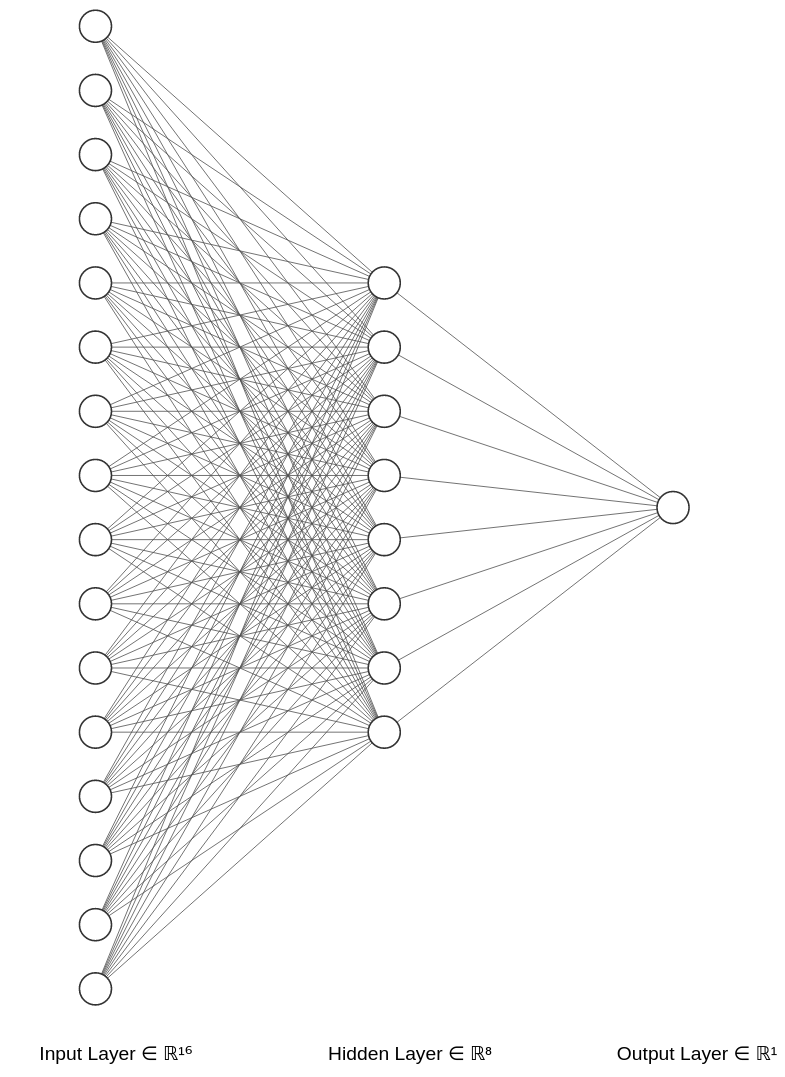

In [ ]:
import torch
from torch import nn

class NeuralLogisticRegression(nn.Module):
    def __init__(self):
        super(NeuralLogisticRegression, self).__init__()
        # 첫 번째 숨겨진 층
        self.hidden1 = nn.Linear(2, 16) # 2개의 입력 특성, 10개의 뉴런
        self.act1 = nn.ReLU() # 비선형 활성화 함수

        # 두 번째 숨겨진 층
        self.hidden2 = nn.Linear(16, 8) # 5개의 뉴런
        self.act2 = nn.ReLU()

        # 출력 층
        self.output = nn.Linear(8, 1) # 1개의 출력

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.output(x)
        y = torch.sigmoid(x) #sigmoid로 선형모델의 결과를 확률로 변환합니다.
        return y

class ComplexerNeuralLogisticRegression(nn.Module):
    def __init__(self):
        super(ComplexerNeuralLogisticRegression, self).__init__()
        self.nonlinear_stack = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        x = self.nonlinear_stack(x)
        y = torch.sigmoid(x)
        return y

In [ ]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

train_x = torch.tensor(total_dataset[:,:2].reshape(-1, 2), dtype=torch.float32)
train_y = torch.tensor(total_dataset[:,2:].reshape(-1, 1), dtype=torch.float32)

# 손실 기록
losses = []
learning_rate = 0.1

# 모델, 손실 함수, 최적화 방법 정의
model = NeuralLogisticRegression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

model.train()
losses = []

model.train()
# 학습 과정
for step in range(5000):
    optimizer.zero_grad()
    predictions = model(train_x)
    loss = criterion(predictions, train_y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if step % 500 == 0:
        print("Step {}: Loss {}".format(step, loss.item()))
# 손실 시각화
plt.plot(losses)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

## 모델 정확도(%) 계산

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 예측 수행
with torch.no_grad():
    predictions = model(train_x)

# 예측값을 이진 값으로 변환 (임계값: 0.5)
predicted_labels = (predictions > 0.5).float()

# 정확도 계산
accuracy = (predicted_labels == train_y).float().mean().item()

print(f'Accuracy: {accuracy * 100:.2f}%')

## 결정영역의 시각화

In [ ]:
# 입력 공간을 덮는 그리드 포인트 생성
x1_range = np.linspace(-4, 4, 200)
x2_range = np.linspace(-4, 4, 200)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# 모델을 평가 모드로 설정
model.eval()

# 그리드 포인트에 대한 예측 수행
with torch.no_grad():
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    predictions = model(grid_tensor)
    predicted_labels = (predictions > 0.5).float()

# 예측 결과를 그리드 크기로 재구성
Z = predicted_labels.view(xx1.shape)

# 데이터와 결정 경계 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=plt.cm.bwr)
plt.scatter(class_A[:, 0], class_A[:, 1], c='red', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], c='blue', label='Class B')
plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.legend()
plt.show()
